# Content
* [Project Description]
* [Step 1 Import Module]
* [Step 2 Import Datasets]
* [Step 3 Checking Datasets]
* [Step 4 Data Improvement]
    * [4.1 name & genre columns]
    * [4.2 rating column]
    * [4.3 year_of_release column]
    * [4.4 critic_score column]
    * [4.5 user_score column]
    * [4.6 Calculating total sales]
* [Step 5 Data Analysis]
    * [5.1 The Number of Games Each Year]
    * [5.2 Platform Sales]
    * [5.3 Data Collection Period]
    * [5.4 Boxplot and Scatterplot Data Analysis]
    * [5.5 Analysis of Total Game Sales Across Different Platforms]
        * [5.5.1 First Platform]
        * [5.5.2 Second Platform]
* [Step 6 Total Sales by Genre]
* [Step 7 User Profiling for Each Region]
    * [7.1 Popular Platforms by Region]
        * [7.1.1 NA Region]
        * [7.1.2 EU Region]
        * [7.1.3 JP Region]
    * [7.2 Popular Genre by Region]
        * [7.3.1 NA Region]
        * [7.3.2 EU Region]
        * [7.3.3 JP Region]
    * [7.3 Sales by Rating]
        * [7.3.1 NA Region]
        * [7.3.2 EU Region]
        * [7.3.3 JP Region]
* [Tahap 8 Hypothesis Testing]
* [Tahap 9 Conclusion]

# Project Description
In this project, we will determine whether a game can be considered successful or not in specific regions or markets and identify which games have the highest sales potential. The data used will be historical sales data from 2016, which includes the game's name, the platform used, release year, genre, user and critic ratings, as well as ESRB rating.

# Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

# Import Datasets

In [2]:
try:
    df_games = pd.read_csv('D:\datasets\games.csv')
except:
    df_games = pd.read_csv('/datasets/games.csv')

# Checking Datasets

In [3]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df_games.duplicated().sum()

0

From the information above, we can deduce that:
- The games data consists of **10** columns, with a total of **16715** entries.
- There are missing values in the `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Rating` columns.
- There are data types that do not match in the `Year_of_Release` and `User_Score` columns.

# Data Improvement

In [7]:
df_games.columns = df_games.columns.str.lower()

In [8]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##  name & genre columns

In [9]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df_games.drop(df_games[df_games["name"].isna()].index, inplace=True)

In [11]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Regarding the missing values mentioned above, I choose to remove them. Since there are only two missing values in the `Name` and `Genre` columns, it will not significantly impact the analysis to be conducted. This may have occurred due to incomplete data entry.

## rating column

In [12]:
df_games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [13]:
df_games['rating_id'] = df_games['rating']

In [14]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [15]:
rating = ['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T']
rating_value = [0, 1, 2, 3, 4, 5, 6, 7]
df_games['rating_id'] = df_games['rating_id'].replace(rating, rating_value)

In [16]:
df_games[df_games['rating']=='AO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO,0.0


In [17]:
rating_without_null = df_games[df_games['rating_id'].notnull()]
rating_without_null.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1.0
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1.0
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1.0


In [18]:
median_rating = rating_without_null.pivot_table(index='genre', values='rating_id', aggfunc='median')
median_rating

,rating_id
genre,
Action,5.0
Adventure,2.0
Fighting,7.0
Misc,1.0
Platform,1.0
Puzzle,1.0
Racing,1.0
Role-Playing,7.0
Shooter,5.0


In [19]:
def rating_median(rating):
    return median_rating['rating_id'][rating]

In [20]:
rating_median('Action')

5.0

In [21]:
df_games['rating_id'] = df_games['genre'].apply(rating_median)

In [22]:
df_games['rating_id'] = df_games['rating_id'].astype('int64')

In [23]:
df_games['rating_id']

0        1
1        1
2        1
3        1
4        7
        ..
16710    5
16711    1
16712    2
16713    1
16714    1
Name: rating_id, Length: 16713, dtype: int64

In [24]:
df_games['rating'] = df_games['rating'].fillna(df_games['rating_id'])
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,1,1
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,7,7


In [25]:
df_games['rating']

0        E
1        1
2        E
3        E
4        7
        ..
16710    5
16711    1
16712    2
16713    1
16714    1
Name: rating, Length: 16713, dtype: object

In [26]:
df_games['rating'] = df_games['rating'].replace(rating_value, rating)

In [27]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,1
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,7


The missing values in the `rating` column amount to **6766**. These missing data may be because game critics and users did not provide ratings, resulting in ESRB not assigning a rating to the respective games.

Since the `rating` column is categorical, we will first create an ID for each rating. After that, we will calculate the median for each `rating_id` and fill the missing values in the `rating` column with the median `rating_id` values.

## year_of_release column

In [28]:
df_games['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [29]:
df_games[df_games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,1
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,1
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,5
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,T,7
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,M,5
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,1
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,1
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,5
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,E10+,2


In [30]:
percentage = len(df_games[df_games['year_of_release'].isnull()])/len(df_games)

In [31]:
print("{:,.2%}".format(percentage))

1.61%


In [32]:
df_games.drop(df_games[df_games["year_of_release"].isna()].index, inplace=True)

In [33]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,1
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,7


In [34]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int64') 

For the missing values in the `year_of_release` column, they account for approximately **1.61%** of the data. These missing values can be safely removed as they constitute less than **5%** of the data, which should not significantly impact the analysis. The cause of these missing values could be due to data entry errors or the fact that many of the games included are older, resulting in incomplete data about them.

## critic_score column

In [35]:
critic_without_null = df_games[df_games['critic_score'].notnull()]
critic_median = critic_without_null.pivot_table(index='genre', values='critic_score', aggfunc='median')
critic_median.sort_values(by='critic_score', ascending=False)

,critic_score
genre,
Sports,75.0
Role-Playing,74.0
Shooter,73.0
Strategy,73.0
Fighting,72.0
Puzzle,70.0
Simulation,70.0
Platform,69.5
Misc,69.0


In [36]:
def get_median(critic):
    return critic_median['critic_score'][critic]

In [37]:
get_median('Action')

68.0

In [38]:
df_games['critic_median'] = df_games['genre'].apply(get_median)

In [39]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,critic_median
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,75.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,1,69.5
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,69.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,75.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,7,74.0


In [40]:
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_median']) 

In [41]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,critic_median
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,75.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,NaN,E,1,69.5
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,69.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,75.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,T,7,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,NaN,M,5,68.0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,NaN,E,1,75.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,E10+,2,66.0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.5,NaN,E,1,69.5


The missing values in the `critic_score` column amount to **8578**. This is a significant number considering the total available data is **16714**. Therefore, we cannot delete this column. We will replace the missing values with the median value for each genre. The reason for this approach is that the values in this column cannot be filled with **0** as it would affect future analysis, for example, when calculating the average. Furthermore, while each game may have different gameplay, the experience within each genre is not significantly different. Therefore, the values should not vary significantly for games within the same genre.

## user_score column

In [42]:
df_games[df_games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,critic_median
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,NaN,E,1,69.5
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,T,7,74.0
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,NaN,E,1,70.0
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73.0,NaN,M,5,73.0
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,70.0,NaN,E,1,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,NaN,M,5,68.0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,NaN,E,1,75.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,E10+,2,66.0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.5,NaN,E,1,69.5


In [43]:
df_games[df_games['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,critic_median
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,75.0,tbd,E,1,75.0
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,1,69.0
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,75.0,tbd,T,1,75.0
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,1,69.0
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,69.0,tbd,E,1,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,5,68.0
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,1,70.0
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,1,70.0
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,70.0,tbd,E,1,70.0


In [44]:
df_games.loc[df_games['user_score']=='tbd', 'user_score'] = np.nan

In [45]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [46]:
score_without_null = df_games[df_games['user_score'].notnull()]

In [47]:
score_without_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,critic_median
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,75.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,69.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,75.0
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1,69.5
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,73.0,8.1,K-A,5,73.0
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,5,68.0
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,5,73.0
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,5,73.0


In [48]:
user_score = score_without_null.groupby(['genre'])['user_score'].median().reset_index()
user_score

,genre,user_score
0,Action,7.4
1,Adventure,7.6
2,Fighting,7.6
3,Misc,7.1
4,Platform,7.7
5,Puzzle,7.5
6,Racing,7.4
7,Role-Playing,7.8
8,Shooter,7.4
9,Simulation,7.5


In [49]:
score_median = user_score.pivot_table(index='genre', values='user_score', aggfunc='median')
score_median

,user_score
genre,
Action,7.4
Adventure,7.6
Fighting,7.6
Misc,7.1
Platform,7.7
Puzzle,7.5
Racing,7.4
Role-Playing,7.8
Shooter,7.4


In [50]:
def get_median_score(genre):
    return score_median['user_score'][genre]

In [51]:
df_games['user_median'] = df_games['genre'].apply(get_median_score)

In [52]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,critic_median,user_median
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,75.0,7.4
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,NaN,E,1,69.5,7.7
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,69.0,7.4
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,75.0,7.4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,T,7,74.0,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,NaN,M,5,68.0,7.4
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,NaN,E,1,75.0,7.4
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,E10+,2,66.0,7.6
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.5,NaN,E,1,69.5,7.7


In [53]:
df_games['user_score'] = df_games['user_score'].fillna(df_games['user_median'])

In [54]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,critic_median,user_median
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,75.0,7.4
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,E,1,69.5,7.7
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,69.0,7.4
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,75.0,7.4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,7,74.0,7.8


In [55]:
df_games['user_score'] = df_games['user_score'].astype('float64')

In [56]:
df_games['user_score']

0        8.0
1        7.7
2        8.3
3        8.0
4        7.8
        ... 
16710    7.4
16711    7.4
16712    7.6
16713    7.7
16714    7.5
Name: user_score, Length: 16444, dtype: float64

The missing values in the `user_score` column are approximately **6605**, and we will fill these values with the median value for each genre, following the same rationale as for the `critic_score` column.

There is a different step involved in replacing values in this column, including:
- For NaN values, they will be replaced with the previously calculated median value.
- For "tbd" values, they will be replaced with NaN. Since "tbd" means it does not have a numerical score yet, it will be replaced with NaN and then further replaced with the median `user_score` based on the genre.

In [57]:
df_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
rating_id          0
critic_median      0
user_median        0
dtype: int64

## Calculating total sales

In [58]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [59]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,critic_median,user_median,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1,75.0,7.4,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,E,1,69.5,7.7,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,69.0,7.4,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1,75.0,7.4,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,7,74.0,7.8,31.38


# Data Analysis

In [60]:
new_df = df_games[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'total_sales']]

In [61]:
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,M,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E10+,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.5,7.7,E,0.01


## The Number of Games Each Year

In [136]:
counted_games = new_df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
counted_games.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


In [138]:
# counted_games.plot(kind='bar', figsize=(10,5))

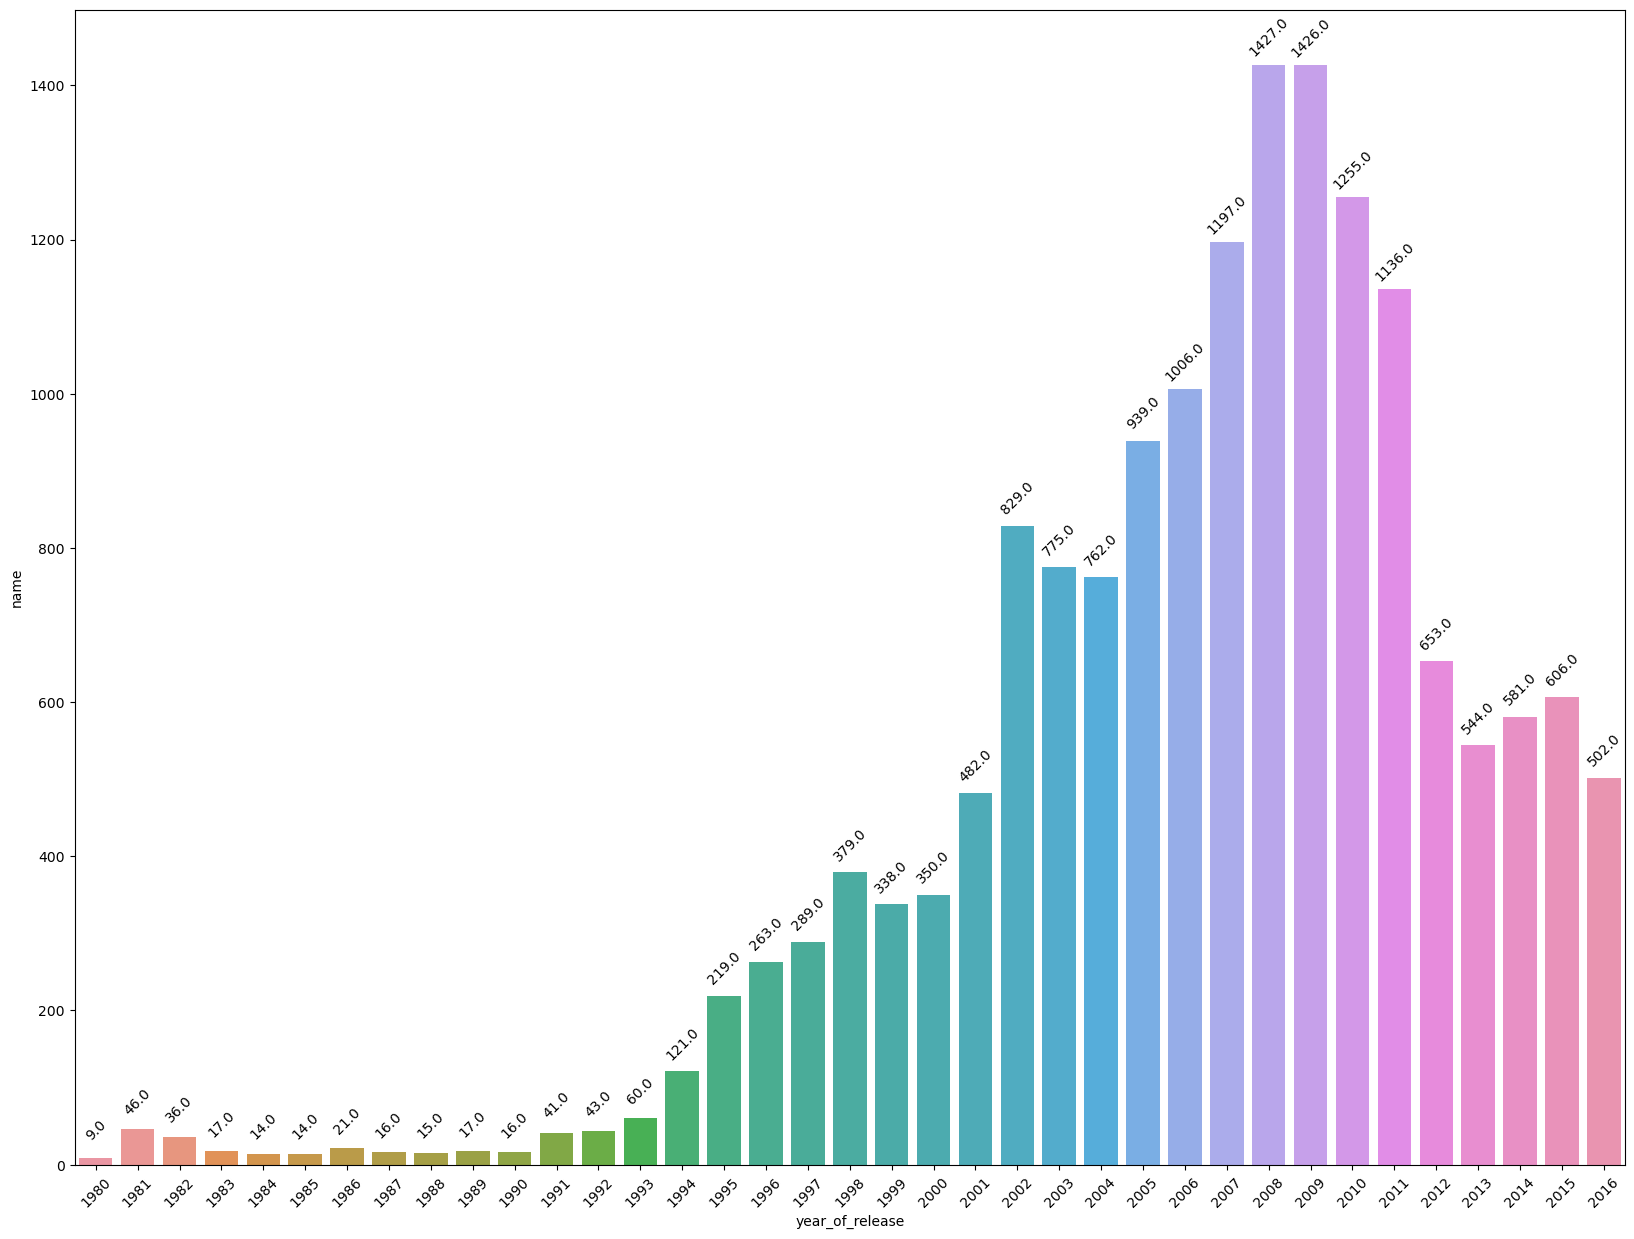

In [139]:
# Creating visualizations for games released per year.
plt.figure(figsize=(20,15))
splot = sns.barplot(data=counted_games, x='year_of_release', y='name') # assign plot into the object
# code anotation
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # label value position
                   xytext = (0, 20), rotation=45, # To rotate the value labels on the plot by 45 degrees and give them a 20-pixel margin from the plot
                   textcoords = 'offset points')

plt.xticks(rotation = 45) # memutar label x axis 45 derajat
plt.show()

From the information above, we can conclude:

1. The number of games from 1980 to 1993 was not very high. This may be because during those years, game developers were limited, technology was not as advanced, and the gaming community was relatively small.

2. The number of games started to increase in 1994 and reached its peak in 2009. This growth can be attributed to the introduction of new gaming consoles and platforms, making games more appealing and accessible. As a result, more games were developed due to the expansion of gaming platforms.

3. There was a decrease in the number of games from 2010 to 2016. This decline could be attributed to a lack of significant changes in gaming platforms during that period. Additionally, the rise of mobile devices and free-to-play games may have contributed to a decrease in interest in traditional gaming platforms, leading to a decline in game releases on those platforms.

## Platform Sales

In [64]:
selling_year = new_df.groupby(['platform', 'year_of_release'])['name'].count().reset_index().rename(columns={'name':'count'})
selling_year.sort_values(by='count', ascending=False).tail(10)

,platform,year_of_release,count
207,Wii,2016,1
23,DC,2007,1
24,DC,2008,1
25,DS,1985,1
36,GB,1988,1
76,N64,2002,1
69,GG,1992,1
65,GEN,1991,1
64,GEN,1990,1
119,PCFX,1996,1


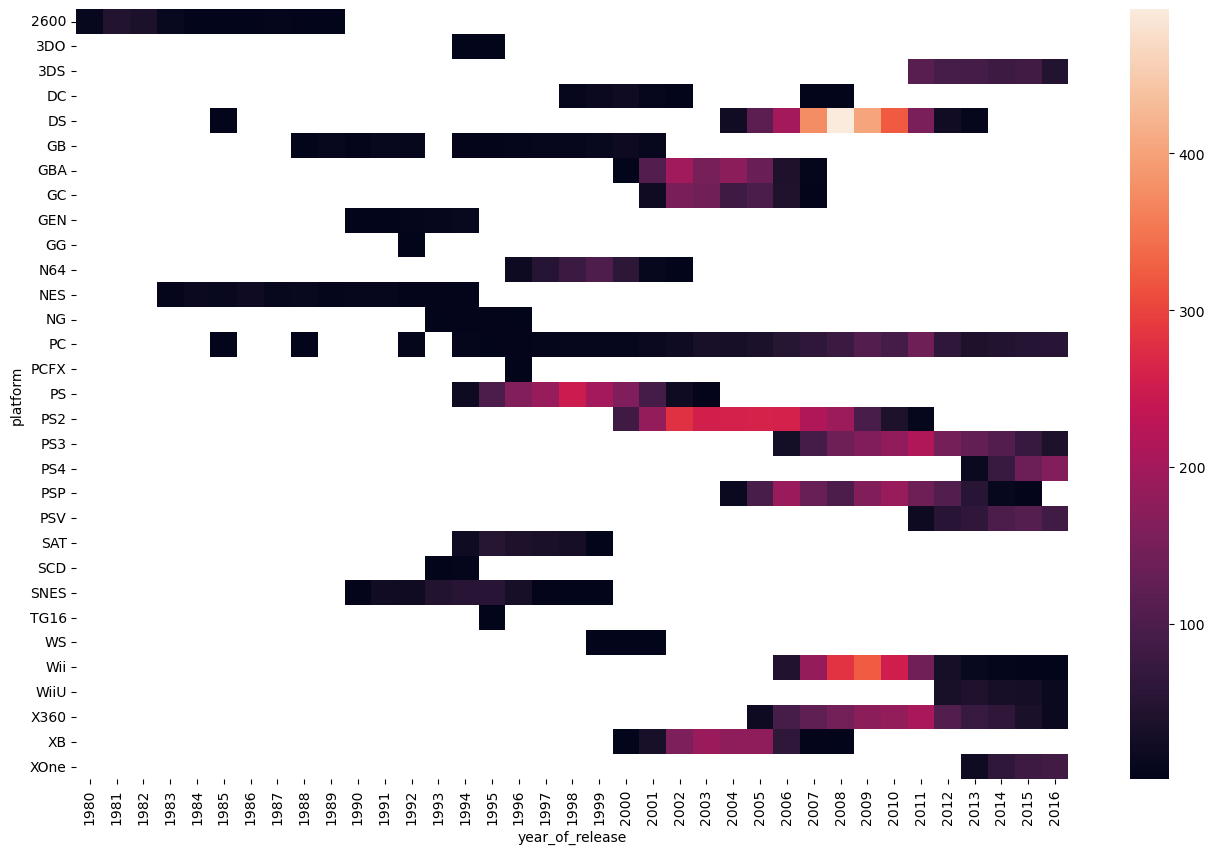

In [65]:
plt.figure(figsize=(16,10))
sns.heatmap(selling_year.pivot(index='platform', columns='year_of_release', values='count'))
plt.show()

In [66]:
test = selling_year.pivot_table(index='platform', values='year_of_release', aggfunc=[np.max, np.min])
test.columns = ['max_year', 'min_year']
test.head()

,max_year,min_year
platform,,
2600,1989,1980
3DO,1995,1994
3DS,2016,2011
DC,2008,1998
DS,2013,1985


In [67]:
test['total_year'] = test['max_year'] - test['min_year']

In [68]:
test.sort_values(by='total_year', ascending=False)

,max_year,min_year,total_year
platform,,,
PC,2016,1985,31
DS,2013,1985,28
GB,2001,1988,13
X360,2016,2005,11
PSP,2015,2004,11
PS2,2011,2000,11
NES,1994,1983,11
DC,2008,1998,10
Wii,2016,2006,10


From the information above, we can conclude:

- The platform that has achieved the highest sales is the DS platform. According to the graph, this platform reached sales of over 400 million units in 2008 and 2009.

- Older platforms with short-lived popularity include 2600, 3DO, DC, WS, SCD, GG, N64, PCFX, and others.

- Older platforms that were once popular but now have no sales at all include DS and PS. They had high sales figures in the past but are currently less popular.

- Generally, older platforms tend to fade away after 4 to 10 years, while new platforms typically emerge a year after the older one declines. It takes around 11 years for a new platform to emerge.

## Data Collection Period

Based on the previous analysis, the data to be taken is from the year **2006** to **2016**. This is because from the year **2006**, there was an increase in sales in various platforms. Although there were some platforms that were very popular before **2006**, most of them did not survive until **2016**.

In [69]:
df_test = new_df[new_df['year_of_release'] >= 2006].reset_index(drop=True)
df_test.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
10328,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69.0,7.4,E,0.00
10329,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,M,0.01
10330,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,E,0.01
10331,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E10+,0.01


In [70]:
df_test.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False)

,name
platform,
DS,1979
PS3,1306
Wii,1286
X360,1214
PSP,1083
PS2,805
PC,776
3DS,512
PSV,429


In [71]:
df_test.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count').fillna(0)

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,0.0,0.0,0.0,0.0,0.0,116.0,93.0,91.0,80.0,86.0,46.0
DC,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DS,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,0.0,0.0,0.0
GBA,39.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GC,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PC,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS2,259.0,214.0,191.0,96.0,38.0,7.0,0.0,0.0,0.0,0.0,0.0
PS3,27.0,90.0,138.0,162.0,181.0,215.0,148.0,126.0,108.0,73.0,38.0
PS4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,75.0,137.0,164.0


<AxesSubplot:xlabel='platform'>

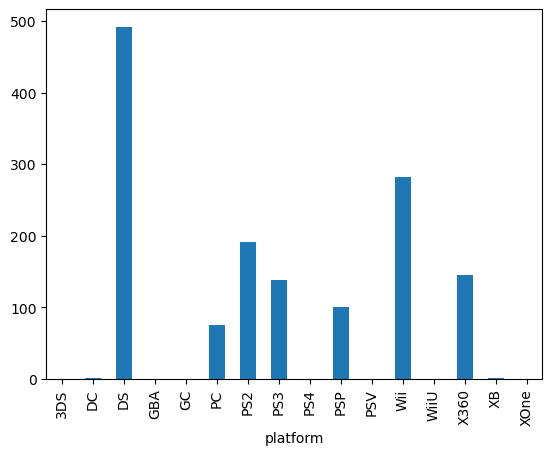

In [72]:
test = df_test.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count').fillna(0)
test[2008].plot(kind='bar')

From the information above, we can conclude:

- The highest sales are held by the DS platform with a total of 1979 units sold. However, these sales only lasted until 2013.

- Platforms that have seen sales growth are the PS4 and XOne platforms.

- Platforms that have experienced a decline in sales are 3DS, PC, PS3, PSV, Wii, and X360.

- Platforms with no sales data until 2016 are DC, DS, GBA, GC, PSP, and XB.

**Conclusion:** The platforms with the potential to generate profits are PS4, PSV, XOne, PC, 3DS, and PS3.

## Boxplot and Scatterplot Data Analysis

In [73]:
columns = ['PS4', 'PSV', 'XOne', 'PC', '3DS', 'PS3']
populer_platform = df_test[df_test['platform'].isin(columns)].reset_index(drop=True)
populer_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
2,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,T,14.60
3,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
4,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
...,...,...,...,...,...,...,...,...,...,...,...,...
3657,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,E10+,0.01
3658,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,69.0,7.1,E,0.01
3659,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,M,0.01
3660,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E10+,0.01


<AxesSubplot:xlabel='na_sales', ylabel='platform'>

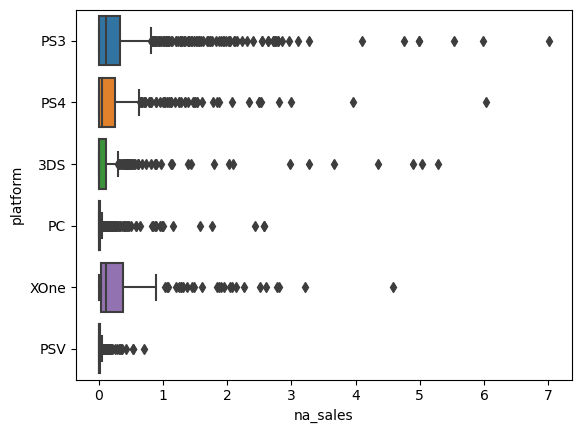

In [74]:
sns.boxplot(data=populer_platform, x="na_sales", y="platform")

<AxesSubplot:xlabel='eu_sales', ylabel='platform'>

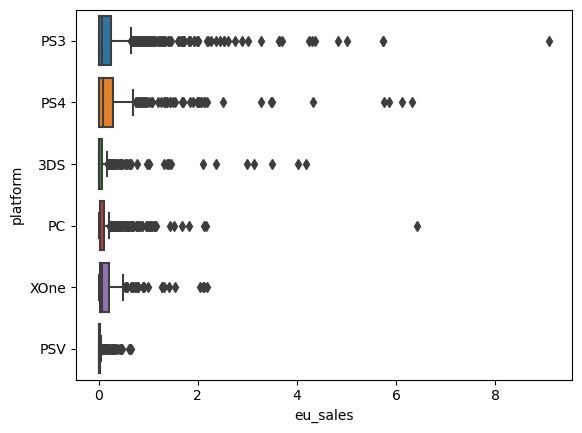

In [75]:
sns.boxplot(data=populer_platform, x="eu_sales", y="platform")

<AxesSubplot:xlabel='jp_sales', ylabel='platform'>

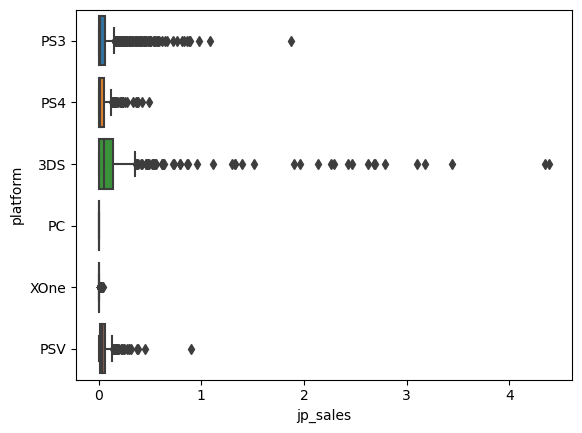

In [76]:
sns.boxplot(data=populer_platform, x="jp_sales", y="platform")

<AxesSubplot:xlabel='other_sales', ylabel='platform'>

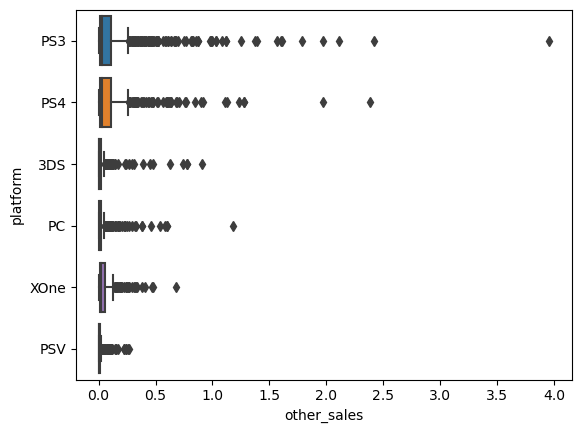

In [77]:
sns.boxplot(data=populer_platform, x="other_sales", y="platform")

In [78]:
populer_platform.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales','other_sales'], aggfunc='mean')

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,0.119668,0.196523,0.161426,0.025918
PC,0.129278,0.000000,0.057281,0.024034
PS3,0.250544,0.060804,0.298721,0.103055
PS4,0.359923,0.040714,0.277398,0.123342
PSV,0.030466,0.050909,0.029068,0.014988
XOne,0.208866,0.001377,0.377004,0.057773


From the information above, we can conclude:

- All platforms have different sales depending on the region.

- For the United States, the highest average sales are for XOne, PS3, and PS4, while the lowest are for PSV, PC, and 3DS.

- For Japan, the highest average sales are for 3DS, and the lowest are for PS3, PSV, PS4, XOne, and PC.

- For Europe, the highest average sales are for PS4, PS3, and XOne, while the lowest are for PC, 3DS, and PSV.

- For other regions, the highest average sales are for PS4 and PS3.

All these differences are significant and are likely influenced by the platform's country of origin. It's possible that they prioritize advertising their own brand over platforms from other countries.

In [79]:
populer_platform.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.067263,-0.041073,0.044918,-0.065147,-0.022097,-0.004239,-0.046321
na_sales,-0.067263,1.000000,0.782059,0.345372,0.842057,0.311542,-0.016480,0.928166
eu_sales,-0.041073,0.782059,1.000000,0.294773,0.924155,0.297152,-0.028721,0.933061
jp_sales,0.044918,0.345372,0.294773,1.000000,0.236652,0.086435,0.106318,0.484336
other_sales,-0.065147,0.842057,0.924155,0.236652,1.000000,0.296639,-0.015845,0.926136
critic_score,-0.022097,0.311542,0.297152,0.086435,0.296639,1.000000,0.449369,0.312877
user_score,-0.004239,-0.016480,-0.028721,0.106318,-0.015845,0.449369,1.000000,-0.001766
total_sales,-0.046321,0.928166,0.933061,0.484336,0.926136,0.312877,-0.001766,1.000000


array([[<AxesSubplot:xlabel='year_of_release', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='na_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='eu_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='jp_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='other_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='critic_score', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='user_score', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='total_sales', ylabel='year_of_release'>],
       [<AxesSubplot:xlabel='year_of_release', ylabel='na_sales'>,
        <AxesSubplot:xlabel='na_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='eu_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='jp_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='other_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='na_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='na_sales'>,
        

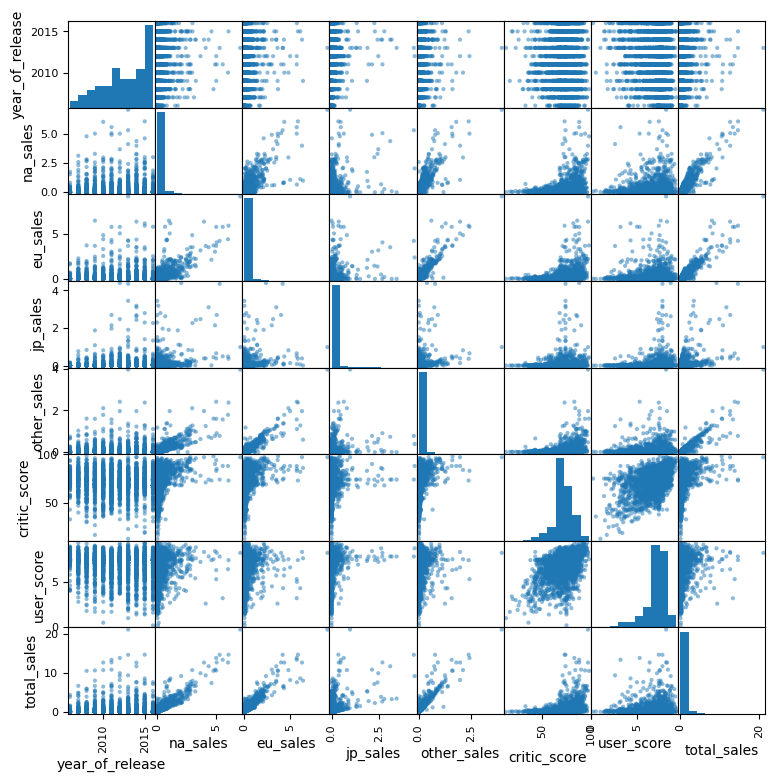

In [80]:
pd.plotting.scatter_matrix(populer_platform, figsize=(9, 9)) 

Based on the information above, it can be concluded that there is a correlation between the income of each country and the ratings from critics and users. Although the correlation may not be very strong, it could suggest that there will still be buyers even if the ratings from critics and users are low.

## Analysis of Total Game Sales Across Different Platforms

In [81]:
populer_platform[populer_platform['name']=='Call of Duty: Modern Warfare 3']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
244,Call of Duty: Modern Warfare 3,PC,2011,Shooter,0.41,0.98,0.00,0.32,78.0,2.5,M,1.71


In [82]:
first_platform = populer_platform.drop_duplicates(subset='name', keep='first').reset_index(drop=True)
first_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
2,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,T,14.60
3,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
4,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33


In [83]:
second_platform = populer_platform.drop_duplicates(subset='name', keep='last').reset_index(drop=True)
second_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,T,14.60
1,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
2,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,T,11.68
4,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81


### First Platform

<AxesSubplot:xlabel='na_sales', ylabel='platform'>

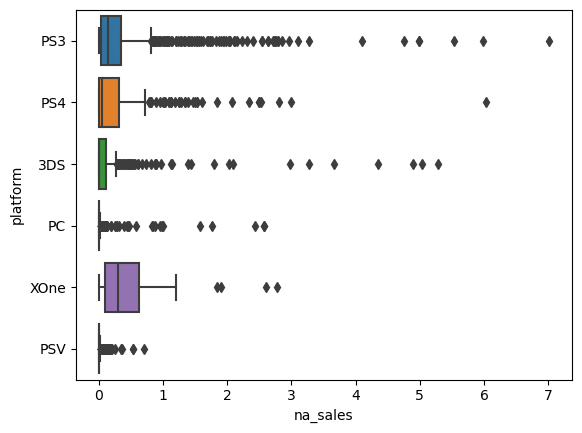

In [84]:
sns.boxplot(data=first_platform, x="na_sales", y="platform")

<AxesSubplot:xlabel='eu_sales', ylabel='platform'>

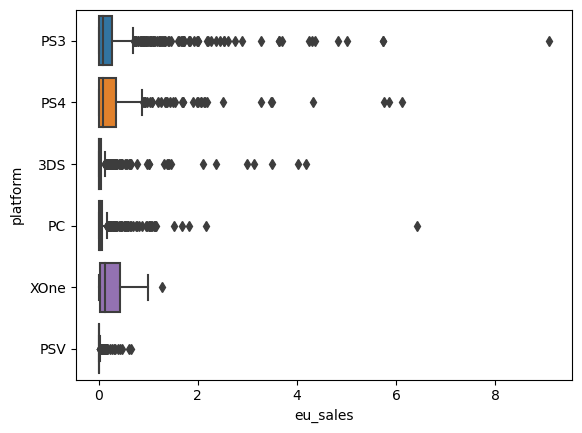

In [85]:
sns.boxplot(data=first_platform, x="eu_sales", y="platform")

<AxesSubplot:xlabel='jp_sales', ylabel='platform'>

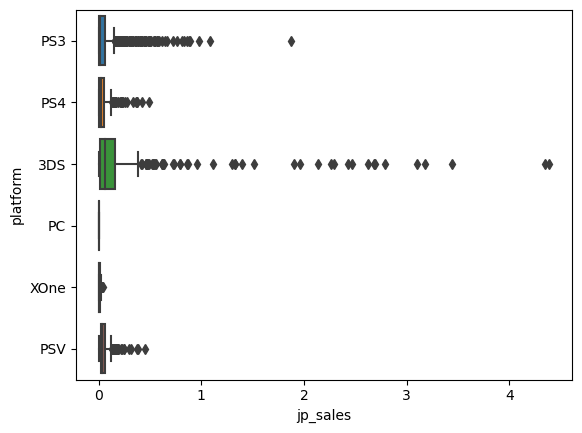

In [86]:
sns.boxplot(data=first_platform, x="jp_sales", y="platform")

<AxesSubplot:xlabel='other_sales', ylabel='platform'>

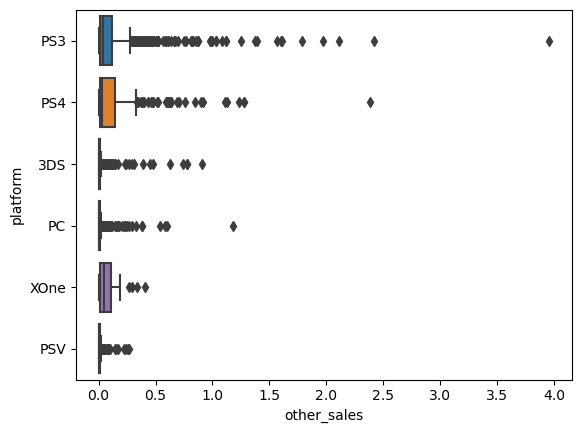

In [87]:
sns.boxplot(data=first_platform, x="other_sales", y="platform")

### Second Platform

<AxesSubplot:xlabel='na_sales', ylabel='platform'>

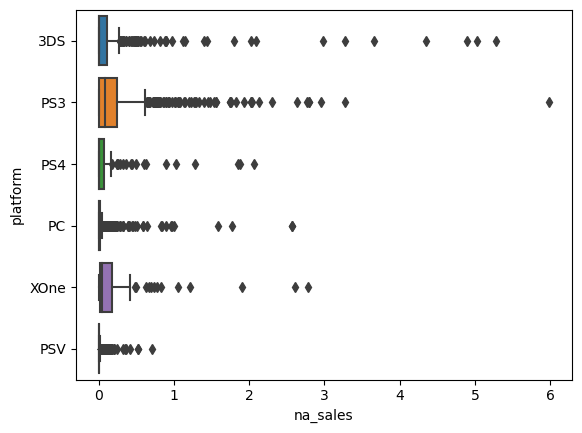

In [88]:
sns.boxplot(data=second_platform, x="na_sales", y="platform")

<AxesSubplot:xlabel='eu_sales', ylabel='platform'>

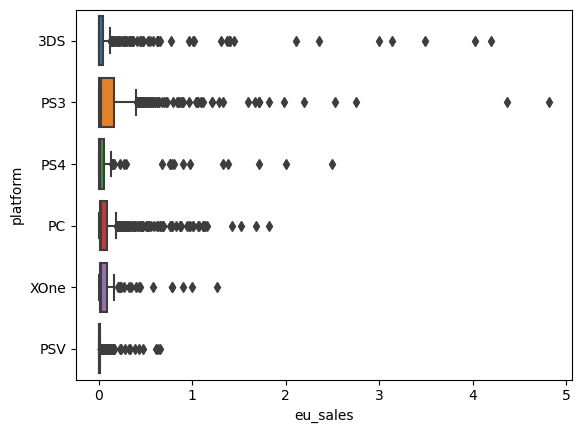

In [89]:
sns.boxplot(data=second_platform, x="eu_sales", y="platform")

<AxesSubplot:xlabel='jp_sales', ylabel='platform'>

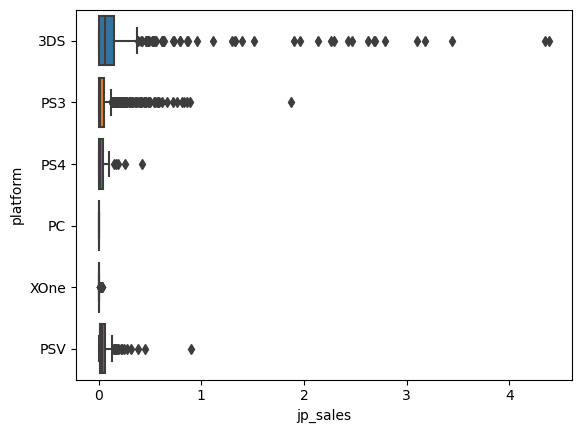

In [90]:
sns.boxplot(data=second_platform, x="jp_sales", y="platform")

<AxesSubplot:xlabel='other_sales', ylabel='platform'>

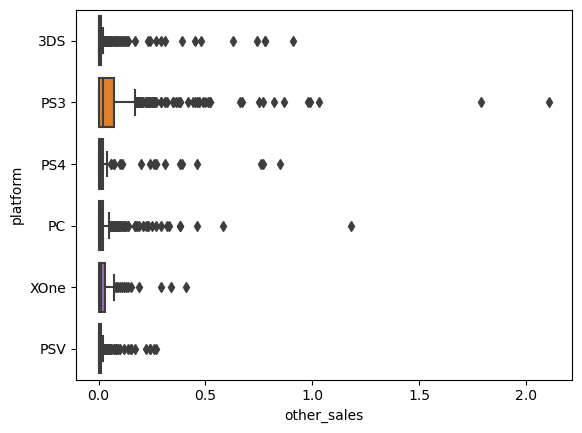

In [91]:
sns.boxplot(data=second_platform, x="other_sales", y="platform")

From the information above, it can be concluded that:

- The choice of platform for a game also affects its sales. This depends on which platform is more convenient for playing a particular game.

- Overall, users tend to purchase games more frequently on platforms like PS4, PS3, and XOne.

# Total Sales by Genre

In [92]:
percentage = populer_platform['genre'].value_counts(normalize=True).reset_index().rename(columns={"genre":"percentage"})
percentage['percentage'] = percentage['percentage'].apply("{:,.2%}".format)
count = populer_platform['genre'].value_counts().reset_index().rename(columns={"genre":"counts"})
distribution = pd.concat([percentage,count[['counts']]], axis=1)
distribution

,index,percentage,counts
0,Action,29.66%,1086
1,Role-Playing,11.99%,439
2,Sports,10.54%,386
3,Shooter,9.89%,362
4,Adventure,8.22%,301
5,Misc,7.02%,257
6,Racing,5.46%,200
7,Strategy,5.00%,183
8,Simulation,4.42%,162
9,Fighting,3.69%,135


<AxesSubplot:xlabel='genre'>

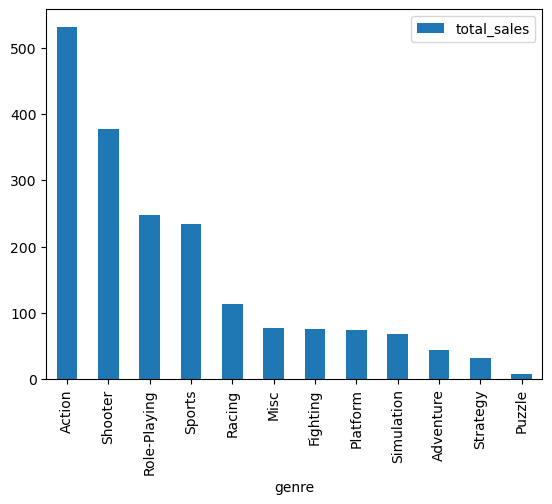

In [93]:
populer_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar')

Based on the information above, it can be concluded that:

- The genre with the highest number of games and the highest sales is action.

- The genre with the lowest number of games and the lowest sales is puzzle.

- Although the role-playing genre is the second most abundant in terms of the number of games, the second highest in terms of sales is the shooter genre.

**Conclusion:** Action genre games are the most popular, while puzzle genre games are the least popular. This could be because action games are more exciting to play compared to puzzle games. Additionally, having a large number of games in a genre does not necessarily guarantee profitability, as seen in the case of shooter and role-playing games.

# User Profiling for Each Region

## Popular Platforms by Region

In [94]:
def sales_platform(area):
    df_1 = populer_platform.groupby('platform')[area].sum().reset_index().sort_values(by=area, ascending=False)
    df_1['market_share'] = (df_1[area]/df_1[area].sum()) * 100
    return df_1.head()

### NA Region

In [95]:
na_region = sales_platform('na_sales')
na_region

,platform,na_sales,market_share
2,PS3,390.13,53.328503
3,PS4,108.74,14.864126
5,XOne,93.12,12.728963
0,3DS,82.65,11.297775
1,PC,44.45,6.076057


### EU Region

In [96]:
eu_region = sales_platform('eu_sales')
eu_region

,platform,eu_sales,market_share
2,PS3,327.21,47.111079
3,PS4,141.09,20.313872
1,PC,100.32,14.443885
0,3DS,61.27,8.821539
5,XOne,51.59,7.427831


### JP Region

In [97]:
jp_region = sales_platform('jp_sales')
jp_region

,platform,jp_sales,market_share
0,3DS,100.62,46.119998
2,PS3,79.41,36.398222
4,PSV,21.84,10.010542
3,PS4,15.96,7.315396
5,XOne,0.34,0.155842


From the information above, it can be concluded that:

- Each region has its own top genres, as seen from the total sales revenue of games in each genre.

- The top platforms in North America (NA) are PS3, PS4, XOne, 3DS, and PC. In this region, PlayStation consoles (PS) occupy the top two positions. This could be because the marketing of PS consoles is more successful in NA than in its home country, JP.

- The top platforms in Europe (EU) are PS3, PS4, PC, 3DS, and XOne. Similar to NA, PS consoles occupy the top two positions in this region. However, PC is in the top three, possibly indicating that gamers in EU prefer using PCs for gaming.

- The top platforms in Japan (JP) are 3DS, PS3, PSV, PS4, and XOne. The most popular platform here is 3DS, likely because it originates from Japan, its home country. This leads to higher marketing success compared to other platforms. PC is the platform with the lowest sales, possibly because the Japanese market prefers using computers for work rather than gaming.

## Populer Genre by Region

In [98]:
def sales_genre(area):
    df_1 = populer_platform.groupby('genre')[area].sum().reset_index().sort_values(by=area, ascending=False)
    df_1['market_share'] = (df_1[area]/df_1[area].sum()) * 100
    return df_1.head()

### NA Region

In [99]:
na_genre = sales_genre('na_sales')
na_genre

,genre,na_sales,market_share
0,Action,204.81,27.996337
8,Shooter,162.03,22.148559
10,Sports,99.31,13.575100
7,Role-Playing,87.21,11.921100
6,Racing,38.12,5.210782


### EU Region

In [100]:
eu_genre = sales_genre('eu_sales')
eu_genre

,genre,eu_sales,market_share
0,Action,192.12,27.661076
8,Shooter,150.18,21.622633
10,Sports,91.64,13.194154
7,Role-Playing,67.07,9.656612
6,Racing,52.73,7.591966


### JP Region

In [101]:
jp_genre = sales_genre('jp_sales')
jp_genre

,genre,jp_sales,market_share
7,Role-Playing,70.09,32.126324
0,Action,64.46,29.545767
8,Shooter,12.21,5.596553
10,Sports,11.98,5.491131
9,Simulation,11.91,5.459046


From the information above, it can be concluded that:

- In North America (NA) and Europe (EU), the most popular genre is action, while in Japan (JP), the most popular genre is role-playing.

- North America (NA) and Europe (EU) have the same top 5 genres.

- Game sales in Japan (JP) are not very high, as seen from the total sales of each genre in the JP region. All of them are below 100. However, it aligns with the Japanese market preference for RPG genre games.

## Sales by Rating

In [102]:
def sales_rating(area):
    df_1 = populer_platform.groupby('rating')[area].sum().reset_index().sort_values(by=area, ascending=False)
    df_1['market_share'] = (df_1[area]/df_1[area].sum()) * 100
    return df_1.head()

### NA Region

In [103]:
na_rating = sales_rating('na_sales')
na_rating

,rating,na_sales,market_share
3,M,313.62,42.870031
5,T,182.62,24.963093
0,E,163.48,22.346766
1,E10+,71.75,9.807808
2,EC,0.09,0.012302


### EU Region

In [104]:
eu_rating = sales_rating('eu_sales')
eu_rating

,rating,eu_sales,market_share
3,M,300.07,43.203513
0,E,186.26,26.817364
5,T,150.24,21.631272
1,E10+,57.95,8.343532
4,RP,0.03,0.004319


### JP Region

In [105]:
jp_rating = sales_rating('jp_sales')
jp_rating

,rating,jp_sales,market_share
5,T,88.57,40.596782
3,M,65.85,30.182885
0,E,50.68,23.229592
1,E10+,13.07,5.990741
2,EC,0.00,0.000000


From the information above, it can be concluded that:

- The North American (NA) and European (EU) markets prefer games with an M rating, which is the rating for action games. It has a market share that is almost double that of E and T ratings.

- The Japanese (JP) market prefers games with a T rating, which is the rating for role-playing games. The market share is almost the same for the M, T, and E genres in the EU and NA regions.

- The lowest rating is EC, possibly because games with an EC rating are designed for children aged 3 and older. Thus, there are fewer children playing games at that age.

In [106]:
populer_platform.pivot_table(index='platform', values='user_score', aggfunc=['mean', 'std','var'])

,mean,std,var
,user_score,user_score,user_score
platform,,,
3DS,7.273438,0.890303,0.792639
PC,6.975129,1.386734,1.923032
PS3,6.961332,1.240139,1.537944
PS4,7.005867,1.238901,1.534876
PSV,7.462937,0.811225,0.658086
XOne,6.761538,1.254106,1.572783


In [107]:
populer_platform.pivot_table(index='genre', values='user_score', aggfunc=['mean', 'std','var'])

,mean,std,var
,user_score,user_score,user_score
genre,,,
Action,7.086188,1.048990,1.100380
Adventure,7.509967,0.798687,0.637900
Fighting,7.258519,1.043915,1.089759
Misc,6.999222,0.843078,0.710781
Platform,7.041000,1.386522,1.922443
Puzzle,7.470588,0.613610,0.376518
Racing,6.781500,1.265669,1.601917
Role-Playing,7.548064,0.892608,0.796749


# Hypothesis Testing

- $H_0 : $ The average user rating of the Xbox One and PC platforms is the same.
- $H_1 : $ The average user rating of the Xbox One and PC platforms is different.

Since we are testing the hypothesis that the user ratings of the Xbox One and PC platforms are either the same or different, we use a two-tailed test. The chosen significance level (alpha) is 0.05.

In [108]:
xbox = populer_platform[populer_platform['platform'] == 'XOne']
pc = populer_platform[populer_platform['platform'] == 'PC']

In [109]:
xbox['user_score'].mean()

6.761538461538461

In [110]:
pc['user_score'].mean()

6.9751288659794

In [111]:
alpha = 0.05
results = st.stats.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False)
print("p-value :", results.pvalue)

if (results.pvalue < alpha):
    print("Kita menolak hipotesis nol.")
else:
    print("Kita menerima hipotesis nol")

p-value : 0.023615849808345052
Kita menolak hipotesis nol.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9600\1530260453.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False)


- $H_0 : $ The average user ratings for the Action and Sports genres are the same.
- $H_1 : $ The average user ratings for the Action and Sports genres are different.

Since we are testing the hypothesis that the user ratings for the Action and Sports genres are either the same or different, we use a two-tailed test. The chosen significance level (alpha) is 0.05.

In [112]:
action = populer_platform[populer_platform['genre'] == 'Action']
sports = populer_platform[populer_platform['genre'] == 'Sports']

In [113]:
action['user_score'].mean()

7.086187845303785

In [114]:
sports['user_score'].mean()

6.42927461139899

In [115]:
results_genre = st.stats.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print("p-value :", results_genre.pvalue)

if (results_genre.pvalue < alpha):
    print("Kita menolak hipotesis nol.")
else:
    print("Kita menerima hipotesis nol")

p-value : 5.1266858437408904e-14
Kita menolak hipotesis nol.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9600\1025676522.py:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results_genre = st.stats.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)


# Conclusion

Before performing the analysis, we need to preprocess the data. This includes:

- Changing column names to lowercase.
- Filling missing values in the `critic_user`, `user_score`, and `rating` columns.
- Removing columns with missing values for which we don't have a clear filling pattern. These columns include `name`, `genre`, and `year_of_release`.
- Changing data types to match the values in the respective columns.

Data Analysis:
- The peak years for video game sales were in 2008 and 2009, with a decline starting in 2012.
- The platform that achieved the highest sales was the DS platform. According to the graph, this platform reached sales of over 400 in 2008 and 2009.
- Older platforms generally fade away after 4 to 10 years, while new platforms usually emerge about a year after older platforms decline. It takes around 11 years for new platforms to appear.
- Platforms with growing sales include PS4 and XOne.
- PS4, PS3, and XOne are the top platforms worldwide.
- Action genre games are the most popular, while puzzle genre games are the least popular. This could be because action games are more exciting to play than puzzle games.
- Each region has different top genres, as seen from the total sales revenue of games in each genre.
- For the NA and EU regions, the most popular genre is action, while in the JP region, the most popular genre is role-playing.
- The NA, EU, and JP markets have different top ratings depending on the games played in each region.

Hypothesis Testing Analysis:
- The values to be tested are user ratings on the PC and Xbox platforms and in the Action and Sports genres.
- The chosen significance level is 5%. This is because we have confidence in the 95% confidence interval.
- The result is that we both reject the null hypothesis.

**Conclusion:** The result of this analysis indicates that the most popular games are those in the Action genre, and they perform well on platforms like PS3, PS4, XOne, and PC. If you want to promote games successfully, it's advisable to focus on promoting Action genre games. If you wish to promote games in other genres, consider using the platforms mentioned earlier, as they align with the preferences of the user base in those markets. This increases the likelihood of users making purchases due to market alignment.